# 1) Data Engineering

### Features Engineering and preprocessing

In [1]:
import pandas as pd
df = pd.read_csv('../Dataset/train_sales.csv', sep = ",")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.shape

(1460, 81)

In [3]:
# it doesn't work when we have too many columns
# df.isnull().sum()
# df.info()

In [102]:
lst_columns = df.columns.values.tolist()
lst_columns
len(lst_columns)

In [7]:
lst_columns

In [7]:
# it is to have a list of columns which contains isnull
c = 0
for i in lst_columns:
    isnull = df[i].isnull().sum()
    if isnull !=0:
        c += 1
        print(i, end = ',')

In [5]:
lst_isnull = ['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual',
              'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
              'Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish',
              'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',]

In [3]:
c = 0
for i in df.columns.values:
    isnull = df[i].isnull().sum()
    if isnull !=0:
        c += 1
        print(f'{c}. Isnull values in {i} is {isnull} which is ---- {isnull / len(df)}')

1. Isnull values in LotFrontage is 259 which is ---- 0.1773972602739726
2. Isnull values in Alley is 1369 which is ---- 0.9376712328767123
3. Isnull values in MasVnrType is 8 which is ---- 0.005479452054794521
4. Isnull values in MasVnrArea is 8 which is ---- 0.005479452054794521
5. Isnull values in BsmtQual is 37 which is ---- 0.025342465753424658
6. Isnull values in BsmtCond is 37 which is ---- 0.025342465753424658
7. Isnull values in BsmtExposure is 38 which is ---- 0.026027397260273973
8. Isnull values in BsmtFinType1 is 37 which is ---- 0.025342465753424658
9. Isnull values in BsmtFinType2 is 38 which is ---- 0.026027397260273973
10. Isnull values in Electrical is 1 which is ---- 0.0006849315068493151
11. Isnull values in FireplaceQu is 690 which is ---- 0.4726027397260274
12. Isnull values in GarageType is 81 which is ---- 0.05547945205479452
13. Isnull values in GarageYrBlt is 81 which is ---- 0.05547945205479452
14. Isnull values in GarageFinish is 81 which is ---- 0.0554794520

In [4]:
# it is to delete columns when their isnull >= 80% 
for i in df.columns.values:
    isnull = df[i].isnull().sum() / len(df)
    if isnull >= 0.8:
        #df = df.drop(columns = df[i])
        df.pop(i)
        print(i)

Alley
PoolQC
Fence
MiscFeature


In [5]:
len(df.columns.values)

77

In [6]:
c = 0
for i in df.columns.values:
    isnull = df[i].isnull().sum()
    if isnull !=0:
        c += 1
        print(f'{c}. Isnull values in {i} is {isnull} which is ---- {isnull / len(df)}')

1. Isnull values in LotFrontage is 259 which is ---- 0.1773972602739726
2. Isnull values in MasVnrType is 8 which is ---- 0.005479452054794521
3. Isnull values in MasVnrArea is 8 which is ---- 0.005479452054794521
4. Isnull values in BsmtQual is 37 which is ---- 0.025342465753424658
5. Isnull values in BsmtCond is 37 which is ---- 0.025342465753424658
6. Isnull values in BsmtExposure is 38 which is ---- 0.026027397260273973
7. Isnull values in BsmtFinType1 is 37 which is ---- 0.025342465753424658
8. Isnull values in BsmtFinType2 is 38 which is ---- 0.026027397260273973
9. Isnull values in Electrical is 1 which is ---- 0.0006849315068493151
10. Isnull values in FireplaceQu is 690 which is ---- 0.4726027397260274
11. Isnull values in GarageType is 81 which is ---- 0.05547945205479452
12. Isnull values in GarageYrBlt is 81 which is ---- 0.05547945205479452
13. Isnull values in GarageFinish is 81 which is ---- 0.05547945205479452
14. Isnull values in GarageQual is 81 which is ---- 0.055479

In [12]:
# print(df[df['FireplaceQu'] == 'Po']['SalePrice'].mean())
# print(df[df['FireplaceQu'] == 'Fa']['SalePrice'].mean())
# print(df[df['FireplaceQu'] == 'TA']['SalePrice'].mean())
# print(df[df['FireplaceQu'] == 'Gd']['SalePrice'].mean())
# print(df[df['FireplaceQu'] == 'Ex']['SalePrice'].mean())      

In [7]:
# df[''].unique()
# df['GarageCond'].value_counts() # to see modes
# df['BsmtFinType1'].mode()[0] # to take the first mode
# df['FireplaceQu'].value_counts().index[1] # to take the second mode

In [7]:
# only to fill isnull with values without converting into numbers
df['LotFrontage'] = df['LotFrontage'].fillna(value = df['LotFrontage'].median()) # 259
df['MasVnrType'] = df['MasVnrType'].fillna(value = df['MasVnrType'].mode()[0]) # 8
df['MasVnrArea'] = df['MasVnrArea'].fillna(value = df['MasVnrArea'].mode()[0]) # 8
df['BsmtQual'] = df['BsmtQual'].fillna(value = df['BsmtQual'].mode()[0]) # 37
df['BsmtCond'] = df['BsmtCond'].fillna(value = df['BsmtCond'].mode()[0]) # 37
df['BsmtExposure'] = df['BsmtExposure'].fillna(value = df['BsmtExposure'].mode()[0]) # 38
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(value = df['BsmtFinType1'].value_counts().index[1]) # 37   
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(value = df['BsmtFinType2'].mode()[0]) # 38
df['Electrical'] = df['Electrical'].fillna(value = df['Electrical'].mode()[0]) # 1
df['FireplaceQu'] = df['FireplaceQu'].fillna(value = df['FireplaceQu'].value_counts().index[1]) #690
df['GarageType'] = df['GarageType'].fillna(value = df['GarageType'].mode()[0]) # 81
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(value = df['GarageYrBlt'].mode()[0]) # 81
df['GarageFinish'] = df['GarageFinish'].fillna(value = df['GarageFinish'].value_counts().index[1]) # 81
df['GarageQual'] = df['GarageQual'].fillna(value = df['GarageQual'].mode()[0]) # 81
df['GarageCond'] = df['GarageCond'].fillna(value = df['GarageCond'].mode()[0]) # 81
                                                                                

In [8]:
df.shape

(1460, 77)

In [39]:
df.info(max_cols = 77)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [169]:
# df.plot.scatter(x='FireplaceQu', y='SalePrice');

In [13]:
dropna_lst = ['MasVnrType', 'MasVnrArea','BsmtQual', 'BsmtCond', 'BsmtExposure',
              'BsmtFinType1','BsmtFinType2', 'Electrical']

# to delete with dropna
c = 0
for i in dropna_lst:
    df[i].dropna(axis = 0)
    c += 1
    print(f'{c}. {i}') # to see the features dropped 

In [7]:
# k = 0
# for i in lst_isnull:
#     mode_ = df[i].fillna(value = df[i].mode)
#     if len(df[i].unique()) >= 7:
#         k += 1
#         print(f' {k}. The filled number in {i} is {mode_}')   

### quantitive or categoric: ordinal = can compare (map), nominal = can't compare (dummies).
### qualitive: numerical = continous, discrete = whole.  

In [111]:
ordinals = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
            'GarageType',' GarageYrBlt',  'GarageFinish', 'GarageQual', 'GarageCond']


Popped:
PoolQC, Fence, MiscFeature and Alley are  
s = 4

Numerical continous:
LotFrontage 
MasVnrArea 
s = 2

Nominal - dummies:
MasVnrType
Electrical 
s = 2

Ordinal:
BsmtQual 
BsmtCond 
BsmtExposure  
BsmtFinType1 
BsmtFinType2 
FireplaceQu 
GarageType  
GarageYrBlt 
GarageFinish 
GarageQual 
GarageCond 
s = 11
total = 15 isnull columns

In [19]:
# for i in df.columns.values:
#     isnull = df[i].isnull().sum() / len(df)
#     if isnull <= 0.8:
#         df[i] = df[i].fillna(value = df[i].mode())
      
        

In [6]:
# dummies  = pd.get_dummies(data = df, columns = ['MSZoning','Street','LotShape',
#                                      'LandContour','Utilities','LotConfig','LandSlope',
#                                      'Neighborhood','Condition1','Condition2', 'BldgType',
#                                      'HouseStyle', 'RoofStyle', 'RoofMatl',
#                                      'Exterior1st','Exterior2nd','MasVnrType',
#                                      'Foundation','Heating','Electrical',
#                                      'SaleType','SaleCondition'])
# df = pd.concat([df, dummies], axis = 1)


In [9]:
# only dummies
for column in ['MSZoning','Street','LotShape',
               'LandContour','Utilities',
               'LotConfig','LandSlope','Neighborhood',                   
               'Condition1','Condition2', 'BldgType',                   
               'HouseStyle', 'RoofStyle', 'RoofMatl',
               'Exterior1st','Exterior2nd','MasVnrType',
               'Foundation','Heating','Electrical',
               'SaleType','SaleCondition']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies

In [10]:
df.shape

(1460, 214)

In [43]:
# to make sure that dummies didnt give me an error while converting 
df.info(max_cols = 214)

In [11]:
# to delete the columns that we used for dummies
df = df.drop(columns = ['MSZoning', 'Street','LotShape',
                        'LandContour', 'Utilities',
                       'LotConfig', 'LandSlope', 'Neighborhood',
                       'Condition1', 'Condition2', 'BldgType',
                       'HouseStyle', 'RoofStyle', 'RoofMatl',
                        'Exterior1st', 'Exterior2nd','MasVnrType',
                        'Foundation','Heating','Electrical',
                        'SaleType','SaleCondition'])

In [12]:
df.shape

(1460, 192)

In [15]:
df.info(max_cols = 192)

In [ ]:
# trial to convert into ordinal the features that might be and apperantly are dummies
# df['MSZoning'] = df['MSZoning'].map({'RL': 5, 'RM': 4, 'C': 2, 'FV': 7, 'RH': 3})
# df['Street'] = df['Street'].map({'Pave': 1, 'Grvl': 0})
# df['LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
# df['LandContour'] = df['LandContour'].map({'Lvl': 3, 'Bnk': 2, 'Low': 0, 'HLS': 1})
# df['Utilities'] = df['Utilities'].map({'AllPub': 1, 'NoSeWa': 0})
# df['LotConfig'] = df['LotConfig'].map({'Inside': 0, 'FR2': 3, 'Corner': 1, 'CulDSac': 2,
#                                       'FR3': 4})
# df['LandSlope'] = df['LandSlope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0})
# Neighborhood # should be ordinal but no idea how to categorize 


In [124]:
# for column in maps:
#     M = maps[i].map({len(maps[i].unique())})
#     print(M)

In [86]:
# df['Functional'].unique()

In [13]:
# only map
df['ExterQual'] = df['ExterQual'].map({'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3})
df['ExterCond'] = df['ExterCond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df['BsmtQual'] = df['BsmtQual'].map({'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}) 
df['BsmtCond'] = df['BsmtCond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3})
df['BsmtExposure'] = df['BsmtExposure'].map({'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'Unf': 0, 'LwQ': 1,
                                         'Rec': 2, 'BLQ': 3, 'ALQ': 4,
                                        'GLQ': 5})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'Unf': 0, 'LwQ': 1,
                                         'Rec': 2, 'BLQ': 3, 'ALQ': 4,
                                        'GLQ': 5})
df['HeatingQC'] = df['HeatingQC'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}) 
df['CentralAir'] = df['CentralAir'].map({'N': 0, 'Y': 1})
df['KitchenQual'] = df['KitchenQual'].map({'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3})
df['Functional'] = df['Functional'].map({'Sev': 0, 'Maj2': 1, 'Maj1': 2,
                                     'Mod': 3, 'Min2': 4, 'Min1': 5, 'Typ':6}) 
df['FireplaceQu'] = df['FireplaceQu'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}) 
df['GarageType'] = df['GarageType'].map({'Detchd': 0, 'CarPort': 1,
                                         'BuiltIn': 2, 'Basment': 3, 'Attchd': 4,
                                        '2Types': 5})
df['GarageFinish'] = df['GarageFinish'].map({'Unf': 0, 'RFn': 1, 'Fin': 2})                                          
df['GarageQual'] = df['GarageQual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}) 
df['GarageCond'] = df['GarageCond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})                                         
df['PavedDrive'] = df['PavedDrive'].map({'N': 0, 'P': 1, 'Y': 2})


In [48]:
# df['PavedDrive'].unique()

In [14]:
len(df.columns.values)

192

In [17]:
# df.info(max_cols = 192)

In [50]:
# df.columns.values

In [15]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,2,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,1,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,2,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,1,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,2,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,1,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,1,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,3,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,1,...,0,0,0,1,0,0,0,0,1,0


In [25]:
df_2 = df.copy()
y_2 = df_2.pop('SalePrice')

In [27]:
df_2.pop('Id')

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [28]:
df_2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,2,2,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,1,2,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,2,2,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,1,2,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,2,2,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,1,2,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,1,2,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,1,2,...,0,0,0,1,0,0,0,0,1,0


In [33]:
X = df.copy()
y = X.pop('SalePrice')

In [35]:
X.pop("Id")

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [36]:
X.shape

(1460, 190)

In [13]:
# from sklearn.preprocessing import StandardScaler

# df_scaled = StandardScaler().fit_transform(df)

### Standartizing 

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(X) 
df_2.loc[:,:] = scaled_values
X_scaled = df_2.loc[:,:]
X_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.666667,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.333333,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.666667,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.333333,0.5,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.666667,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)

In [39]:
import matplotlib.pyplot as plt

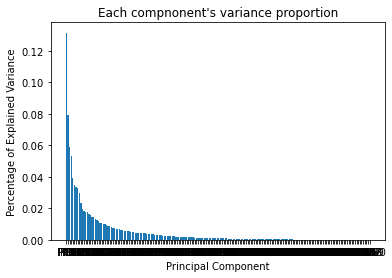

In [40]:
per_var = pca.explained_variance_ratio_ # gives us how much of info each PC contains in % 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] # from PC1 to the last PC

plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title("Each compnonent's variance proportion")
plt.show();

In [41]:
pca_X = pd.DataFrame(pca_data, columns = labels)
pca_X.head() # it gives me PCA df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190
0,1.255109,0.588901,0.117273,0.977192,-0.680810,-0.758188,-0.192455,0.131001,-0.319501,0.217986,...,-2.428613e-17,-3.469447e-17,1.073360e-16,-2.775558e-17,1.561251e-17,-1.964574e-16,-4.553649e-17,3.122502e-17,-5.421011e-17,-1.019150e-16
1,-0.555173,-0.593721,0.186309,-0.338218,-0.444257,0.003222,-0.057149,0.462565,0.651284,0.325812,...,-1.006140e-16,-3.538836e-16,5.876376e-17,1.647987e-17,1.014813e-16,-7.589415e-17,3.014082e-16,2.740863e-16,1.643650e-16,2.645453e-17
2,1.621947,0.122701,-0.747175,0.576899,-0.581366,-0.195728,0.084781,-0.204753,-0.730305,0.009794,...,-2.428613e-17,-9.714451e-17,1.073360e-16,-5.551115e-17,-5.030698e-17,-4.727121e-17,-9.063930e-17,1.977585e-16,-2.346214e-16,-7.415943e-17
3,-0.261729,0.350509,-1.501208,-0.531755,0.759782,0.314414,-0.224362,0.480597,0.155198,0.297275,...,-2.099015e-16,2.220446e-16,3.146355e-16,7.546047e-17,2.406929e-17,-3.371869e-16,1.910364e-16,-1.942890e-16,1.340074e-16,-1.890849e-16
4,1.735856,-0.020161,-1.121672,0.592455,-0.116714,-0.183965,0.255779,0.303892,-0.381988,0.263516,...,3.816392e-17,-3.816392e-16,-8.695301e-17,3.608225e-16,-2.081668e-17,6.722053e-17,-9.063930e-17,1.283695e-16,8.239937e-18,3.686287e-17


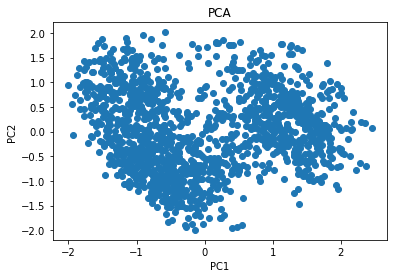

In [42]:
x = pca_X['PC1']
z = pca_X['PC2']

plt.scatter(x, z);
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

In [62]:
# pca.explained_variance_ratio_ # gives us how much info each PCA contains in %

In [65]:
# pca.explained_variance_ # it gives variance of each component

In [71]:
# pca.components_[0] # to see how much of info was used in the PC1 from each feature in initial df

In [43]:
sum(pca.explained_variance_ratio_[0:75]) # gives us sum of variance

0.9476887232087072

In [44]:
pca_lst = pca_X.columns.values.tolist()
pca_lst
len(pca_lst)

190

In [45]:
pca_75 = pca_lst[0:75]

In [46]:
pca_X_new = pd.DataFrame(pca_data[:, 0:75], columns = pca_75)
pca_X_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75
0,1.255109,0.588901,0.117273,0.977192,-0.680810,-0.758188,-0.192455,0.131001,-0.319501,0.217986,...,-0.075657,-0.001056,0.020881,-0.000135,0.049241,0.034335,0.073934,0.009144,0.019875,0.033823
1,-0.555173,-0.593721,0.186309,-0.338218,-0.444257,0.003222,-0.057149,0.462565,0.651284,0.325812,...,0.198616,-0.010824,-0.109139,-0.091255,-0.201103,-0.196182,0.008553,-0.048958,-0.088262,0.301231
2,1.621947,0.122701,-0.747175,0.576899,-0.581366,-0.195728,0.084781,-0.204753,-0.730305,0.009794,...,-0.057566,-0.028086,-0.018558,0.062119,0.101173,0.060278,0.013166,0.028765,-0.017632,-0.006511
3,-0.261729,0.350509,-1.501208,-0.531755,0.759782,0.314414,-0.224362,0.480597,0.155198,0.297275,...,-0.368052,-0.245857,0.002263,-0.232322,0.232323,-0.296183,0.025428,-0.026197,-0.102694,-0.009611
4,1.735856,-0.020161,-1.121672,0.592455,-0.116714,-0.183965,0.255779,0.303892,-0.381988,0.263516,...,0.060376,-0.014812,0.041741,0.057692,0.008079,0.127498,0.077496,0.122721,0.023123,-0.109823


In [47]:
pca_X_new.shape

(1460, 75)

In [49]:
# pca_X_new.info(max_cols = 75)

### Training the regression models

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(pca_X_new, y, test_size = 0.2)

In [52]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [53]:
tree = DecisionTreeRegressor(min_samples_split = 100) # I used Random Search, best params

# tree.fit(X_train, y_train)
# tree. score(X_train, y_train), tree.score(X_test, y_test)

In [99]:
# tree.get_params()

In [75]:
# # Random Search for Decision Tree Regressor
# max_depth = list(np.arange(5, 100, 5))
# min_samples_split = list(np.arange(5, 100, 5))
# K_fold = 5

# params_table = {'max_depth': max_depth,'min_samples_split': min_samples_split}

# RS = RandomizedSearchCV(estimator = tree,
#                        param_distributions = params_table,
#                        n_iter = 100,
#                        cv = 5,
#                        n_jobs = -1)

In [76]:
# %%time
# RS.fit(X_train, y_train)

Wall time: 19.9 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45,
                                                              50, 55, 60, 65,
                                                              70, 75, 80, 85,
                                                              90, 95]})

In [77]:
# RS.best_params_

{'min_samples_split': 95, 'max_depth': 5}

In [54]:
RFR = RandomForestRegressor(n_estimators = 50,
                 min_samples_split = 3,
                 min_samples_leaf = 1,
                 max_depth = 10)

# RFR.fit(X_train, y_train)
# RFR. score(X_train, y_train), RFR.score(X_test, y_test)

In [101]:
# estimators = list(np.arange(25, 300, 25))
# max_depth = list(np.arange(5, 100, 5))
# min_samples_leaf = list(np.arange(1, 70, 2))
# min_samples_split = list(np.arange(1, 70, 2))
# K_fold = 5

# params_table = {'n_estimators': estimators,
#              'max_depth': max_depth,
#              'min_samples_leaf': min_samples_leaf,
#              'min_samples_split': min_samples_split}

# RS = RandomizedSearchCV(estimator = RFR,
#                        param_distributions = params_table,
#                        n_iter = 70,
#                        cv = 5,
#                        n_jobs = -1)

In [102]:
# %%time
# RS.fit(X_train, y_train)

Wall time: 9min 44s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=70,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 19, 21,
                                                             23, 25, 27, 29, 31,
                                                             33, 35, 37, 39, 41,
                                                             43, 45, 47, 49, 51,
                                                             53, 55, 57, 59, ...],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 19,
               

In [106]:
# RS.best_params_

{'n_estimators': 50,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [55]:
GBR = GradientBoostingRegressor(n_estimators = 250,
                 min_samples_split = 57,
                 min_samples_leaf = 17,
                 max_depth = 5)

# GBR.fit(X_train, y_train)
# GBR. score(X_train, y_train), GBR.score(X_test, y_test)

In [111]:
# GBR.get_params()

In [112]:
# estimators = list(np.arange(25, 300, 25))
# max_depth = list(np.arange(5, 100, 5))
# min_samples_leaf = list(np.arange(1, 70, 2))
# min_samples_split = list(np.arange(1, 70, 2))
# K_fold = 5

# params_table = {'n_estimators': estimators,
#              'max_depth': max_depth,
#              'min_samples_leaf': min_samples_leaf,
#              'min_samples_split': min_samples_split}

# RS = RandomizedSearchCV(estimator = GBR,
#                        param_distributions = params_table,
#                        n_iter = 70,
#                        cv = 5,
#                        n_jobs = -1)

In [118]:
# %%time
# RS.fit(X_train, y_train)

Wall time: 2h 33min 39s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=70,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 19, 21,
                                                             23, 25, 27, 29, 31,
                                                             33, 35, 37, 39, 41,
                                                             43, 45, 47, 49, 51,
                                                             53, 55, 57, 59, ...],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 19,
           

In [119]:
# RS.best_params_

{'n_estimators': 250,
 'min_samples_split': 57,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [56]:
print(tree)
print(RFR)
print(GBR)

DecisionTreeRegressor(min_samples_split=100)
RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=50)
GradientBoostingRegressor(max_depth=5, min_samples_leaf=17,
                          min_samples_split=57, n_estimators=250)


### Stacking

In [57]:
from sklearn.ensemble import StackingRegressor

In [58]:
models_list = [('tree', tree),
               ('RFR', RFR),
               ('GBR', GBR)]

In [59]:
stack_RFR = StackingRegressor(estimators = models_list,
                               final_estimator = RFR,
                               cv = 7,  n_jobs = -1)
stack_RFR.fit(X_train, y_train)
stack_RFR.score(X_train, y_train), stack_RFR.score(X_test, y_test) 

(0.8381367292486109, 0.7012022243023086)

In [60]:
# Stack with all data
stack_RFR.fit(pca_X_new, y)
stack_RFR.score(pca_X_new, y)

0.9259134582786209

### Test predict

In [61]:
df_test = pd.read_csv('../Dataset/test_sales.csv', sep = ',') # in this dataframe I don't have 
# real 'y'
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [62]:
df_test.shape, pca_X_new.shape

((1459, 80), (1460, 75))

In [63]:
ID = df_test['Id']

In [64]:
c = 0
for i in df_test.columns.values:
    isnull = df_test[i].isnull().sum()
    if isnull !=0:
        c += 1
        print(f'{c}. Isnull values in {i} is {isnull} which is ---- {isnull / len(df_test)}')

1. Isnull values in MSZoning is 4 which is ---- 0.0027416038382453737
2. Isnull values in LotFrontage is 227 which is ---- 0.15558601782042494
3. Isnull values in Alley is 1352 which is ---- 0.9266620973269363
4. Isnull values in Utilities is 2 which is ---- 0.0013708019191226869
5. Isnull values in Exterior1st is 1 which is ---- 0.0006854009595613434
6. Isnull values in Exterior2nd is 1 which is ---- 0.0006854009595613434
7. Isnull values in MasVnrType is 16 which is ---- 0.010966415352981495
8. Isnull values in MasVnrArea is 15 which is ---- 0.01028101439342015
9. Isnull values in BsmtQual is 44 which is ---- 0.03015764222069911
10. Isnull values in BsmtCond is 45 which is ---- 0.030843043180260453
11. Isnull values in BsmtExposure is 44 which is ---- 0.03015764222069911
12. Isnull values in BsmtFinType1 is 42 which is ---- 0.02878684030157642
13. Isnull values in BsmtFinSF1 is 1 which is ---- 0.0006854009595613434
14. Isnull values in BsmtFinType2 is 42 which is ---- 0.0287868403015

In [65]:
# it is to delete columns when their isnull >= 80% 
for i in df_test.columns.values:
    isnull = df_test[i].isnull().sum() / len(df_test)
    if isnull >= 0.8:
        #df = df.drop(columns = df[i])
        df_test.pop(i)
        print(i)

Alley
PoolQC
Fence
MiscFeature


In [93]:
c = 0
for i in df_test.columns.values:
    isnull = df_test[i].isnull().sum()
    if isnull !=0:
        c += 1
        print(f'{c}. Isnull values in {i} is {isnull} which is ---- {isnull / len(df_test)}')

In [82]:
df_test['SaleType'].unique()

array(['WD', 'COD', 'New', 'ConLD', 'Oth', 'Con', 'ConLw', 'ConLI', 'CWD',
       nan], dtype=object)

In [83]:
df_test['SaleType'].value_counts() # to see modes

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [140]:
df_test['MSZoning'].mode()[0] # to take the first mode

'RL'

In [ ]:
# df['FireplaceQu'].value_counts().index[1] # to take the second mode

In [68]:
df_test['Utilities'] = df_test['Utilities'].fillna(value = df_test['Utilities'].mode()[0]) # 2
df_test['MSZoning'] = df_test['MSZoning'].fillna(value = df_test['MSZoning'].mode()[0]) # 4
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(value = df_test['LotFrontage'].median()) # 227
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(value = df_test['MasVnrType'].mode()[0]) # 16
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(value = df_test['MasVnrArea'].mode()[0]) # 15
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(value = df_test['BsmtQual'].mode()[0]) # 44
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(value = df_test['BsmtCond'].mode()[0]) # 45
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(value = df_test['BsmtExposure'].mode()[0]) # 44
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(value = df_test['BsmtFinType1'].value_counts().index[1]) # 42   
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(value = df_test['BsmtFinType2'].mode()[0]) # 42
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(value = df_test['FireplaceQu'].value_counts().index[1]) # 730
df_test['GarageType'] = df_test['GarageType'].fillna(value = df_test['GarageType'].mode()[0]) # 76
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(value = df_test['GarageYrBlt'].mode()[0]) # 78
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(value = df_test['GarageFinish'].value_counts().index[1]) # 78
df_test['GarageQual'] = df_test['GarageQual'].fillna(value = df_test['GarageQual'].mode()[0]) # 78
df_test['GarageCond'] = df_test['GarageCond'].fillna(value = df_test['GarageCond'].mode()[0]) # 78

In [84]:
for i in df_test.columns.values:
    isnull = df_test[i].isnull().sum()
    if isnull <= 3:
        df_test[i] = df_test[i].fillna(value = df_test[i].mode()[0])
        

In [145]:
df_test.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'C (all)', 'FV', 'RH', 'RL', 'RM', 'Grvl',
       'Pave', 'IR1', 'IR2', 'IR3', 'Reg', 'Bnk', 'HLS', 'Low', 'Lvl',
       'AllPub', 'Corner', 'CulDSac', 'FR2', 'FR

In [148]:
pca_X_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75
0,1.255109,0.588901,0.117273,0.977192,-0.680810,-0.758188,-0.192455,0.131001,-0.319501,0.217986,...,-0.075657,-0.001056,0.020881,-0.000135,0.049241,0.034335,0.073934,0.009144,0.019875,0.033823
1,-0.555173,-0.593721,0.186309,-0.338218,-0.444257,0.003222,-0.057149,0.462565,0.651284,0.325812,...,0.198616,-0.010824,-0.109139,-0.091255,-0.201103,-0.196182,0.008553,-0.048958,-0.088262,0.301231
2,1.621947,0.122701,-0.747175,0.576899,-0.581366,-0.195728,0.084781,-0.204753,-0.730305,0.009794,...,-0.057566,-0.028086,-0.018558,0.062119,0.101173,0.060278,0.013166,0.028765,-0.017632,-0.006511
3,-0.261729,0.350509,-1.501208,-0.531755,0.759782,0.314414,-0.224362,0.480597,0.155198,0.297275,...,-0.368052,-0.245857,0.002263,-0.232322,0.232323,-0.296183,0.025428,-0.026197,-0.102694,-0.009611
4,1.735856,-0.020161,-1.121672,0.592455,-0.116714,-0.183965,0.255779,0.303892,-0.381988,0.263516,...,0.060376,-0.014812,0.041741,0.057692,0.008079,0.127498,0.077496,0.122721,0.023123,-0.109823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.633885,1.142402,-0.282287,0.040245,-0.508123,-0.828583,-0.554186,-0.250550,0.178508,-0.388220,...,-0.107156,-0.025017,-0.032264,0.044013,0.006186,-0.023369,-0.011127,-0.001244,-0.068215,0.035407
1456,-0.514072,-0.856871,0.496914,0.282904,-0.609348,-0.085702,-0.338258,0.043864,0.068279,0.103965,...,0.132651,-0.030593,0.042868,-0.141974,-0.070636,0.000965,-0.150482,-0.109563,-0.039348,-0.070886
1457,-0.049410,0.682164,-0.279657,0.401728,-0.409381,-0.301836,-0.224323,-0.449712,0.776310,0.211315,...,-0.095381,0.082099,0.096588,-0.177953,0.012399,-0.032219,0.064978,0.061968,-0.101322,-0.048550
1458,-1.113062,-0.994037,0.832083,-0.148259,0.066681,-0.486649,0.173754,-0.560726,0.675796,-0.360841,...,0.159008,0.082529,0.035748,-0.078298,-0.099966,-0.108984,-0.014378,-0.108243,0.119917,-0.079113


In [149]:
df_test.shape

(1459, 181)

In [90]:
# df_test.info(max_cols = 76)

In [88]:
df_test['GarageArea'].describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [91]:
# df_test['GarageArea'].unique()

In [129]:
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(value = df_test['BsmtFinSF1'].median())
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(value = df_test['BsmtFinSF2'].median())
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(value = df_test['BsmtUnfSF'].median())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(value = df_test['TotalBsmtSF'].median())
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(value = df_test['BsmtFullBath'].max())
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(value = df_test['BsmtHalfBath'].max())
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(value = df_test['KitchenQual'].median())
df_test['Functional'] = df_test['Functional'].fillna(value = df_test['Functional'].median())
df_test['GarageCars'] = df_test['GarageCars'].fillna(value = df_test['GarageCars'].median())
df_test['GarageArea'] = df_test['GarageArea'].fillna(value = df_test['GarageArea'].median())


In [153]:
df_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,1,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,1,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,1,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,2,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,1,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,1,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,1,...,0,0,0,1,0,0,0,0,1,0


In [94]:
for column in ['MSZoning','Street','LotShape',
               'LandContour','Utilities',
               'LotConfig','LandSlope','Neighborhood',                   
               'Condition1','Condition2', 'BldgType',                   
               'HouseStyle', 'RoofStyle', 'RoofMatl',
               'Exterior1st','Exterior2nd','MasVnrType',
               'Foundation','Heating','Electrical',
               'SaleType','SaleCondition']:
    dummies = pd.get_dummies(df_test[column])
    df_test[dummies.columns] = dummies

In [95]:
df_test = df_test.drop(columns = ['MSZoning', 'Street','LotShape',
                        'LandContour', 'Utilities',
                       'LotConfig', 'LandSlope', 'Neighborhood',
                       'Condition1', 'Condition2', 'BldgType',
                       'HouseStyle', 'RoofStyle', 'RoofMatl',
                        'Exterior1st', 'Exterior2nd','MasVnrType',
                        'Foundation','Heating','Electrical',
                        'SaleType','SaleCondition'])

In [96]:
df_test['ExterQual'] = df_test['ExterQual'].map({'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3})
df_test['ExterCond'] = df_test['ExterCond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df_test['BsmtQual'] = df_test['BsmtQual'].map({'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}) 
df_test['BsmtCond'] = df_test['BsmtCond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3})
df_test['BsmtExposure'] = df_test['BsmtExposure'].map({'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3})
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].map({'Unf': 0, 'LwQ': 1,
                                         'Rec': 2, 'BLQ': 3, 'ALQ': 4,
                                        'GLQ': 5})
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].map({'Unf': 0, 'LwQ': 1,
                                         'Rec': 2, 'BLQ': 3, 'ALQ': 4,
                                        'GLQ': 5})
df_test['HeatingQC'] = df_test['HeatingQC'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}) 
df_test['CentralAir'] = df_test['CentralAir'].map({'N': 0, 'Y': 1})
df_test['KitchenQual'] = df_test['KitchenQual'].map({'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3})
df_test['Functional'] = df_test['Functional'].map({'Sev': 0, 'Maj2': 1, 'Maj1': 2,
                                     'Mod': 3, 'Min2': 4, 'Min1': 5, 'Typ':6}) 
df_test['FireplaceQu'] = df_test['FireplaceQu'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}) 
df_test['GarageType'] = df_test['GarageType'].map({'Detchd': 0, 'CarPort': 1,
                                         'BuiltIn': 2, 'Basment': 3, 'Attchd': 4,
                                        '2Types': 5})
df_test['GarageFinish'] = df_test['GarageFinish'].map({'Unf': 0, 'RFn': 1, 'Fin': 2})                                          
df_test['GarageQual'] = df_test['GarageQual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}) 
df_test['GarageCond'] = df_test['GarageCond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})                                         
df_test['PavedDrive'] = df_test['PavedDrive'].map({'N': 0, 'P': 1, 'Y': 2})

In [142]:
# df_test['SaleCondition'].unique()

In [150]:
df_test.shape

(1459, 181)

In [151]:
X.shape

(1460, 190)

In [152]:
df_2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.666667,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.333333,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.666667,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.333333,0.50,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.666667,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.333333,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.333333,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,1.000000,0.75,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.333333,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
df_test['NoSeWa'] = 0
df_test['Add1'] = 0
df_test['Add2'] = 0
df_test['Add3'] = 0
df_test['2.5Fin'] = 0
df_test['ClyTile'] = 0
df_test['Membran'] = 0
df_test['Metal'] = 0
df_test['Roll'] = 0
df_test['Add4'] = 0
df_test['Add5'] = 0
df_test['Other'] = 0
df_test['Floor'] = 0
df_test['OthW'] = 0
df_test['Mix'] = 0

In [105]:
df_test['RRAe'].unique()

array([0], dtype=int64)

In [134]:
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,ClyTile,Membran,Metal,Roll,Add4,Add5,Other,Floor,OthW,Mix
0,1461,20,80.0,11622,5,6,1961,1961,0.0,2,...,0,0,0,0,0,0,0,0,0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,2,...,0,0,0,0,0,0,0,0,0,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,2,...,0,0,0,0,0,0,0,0,0,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,2,...,0,0,0,0,0,0,0,0,0,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,3,...,0,0,0,0,0,0,0,0,0,0


In [135]:
RFR

RandomForestRegressor(max_depth=12, min_samples_split=9, n_estimators=25)

In [136]:
RFR_predict = RFR.predict(df_test)

In [141]:
RFR_final = pd.DataFrame({'ID': df_test['Id'],
                       'SalePrice': RFR_predict})
RFR_final.to_csv('Mirbek_RFR_Predict.csv', index = False)

In [142]:
GBR

GradientBoostingRegressor(min_samples_split=11, n_estimators=175)

In [143]:
GBR_predict = GBR.predict(df_test)

In [144]:
GBR_final = pd.DataFrame({'ID': df_test['Id'],
                       'SalePrice': GBR_predict})
GBR_final.to_csv('Mirbek_GBR_Predict.csv', index = False)